# Project 2
### Due: Feb 22

Pick one of the datasets listed below. Then, do the following:
- Load it into a notebook using Pandas
- Find anything in it that needs to be cleaned. This could include rows with missing data, columns with data stored as the wrong type, dates that are stored as strings instead of dates, and more.
- Create the following items:
    - **A presentation:** Your presentation should be approximately 10 minutes in length, and cover the main topics. You can save code and nitty-gritty details for your notebook.
    - **A Jupyter notebook:** The notebook should include a mixture of Markdown cells describing your work, and code. There should be no scratch work, everything should be easy to read.
    - **An article on your LinkedIn page:** This should be comprehensible by a general, non-data science audience. Include graphs to back up your results. Include a link to your Github repository for this project.
- Each person on the team should create a new Github repository. It should have the following:
    - A nice title. Don't call it "Project 2". Make it something interesting so that someone not in this class would want to see what you did.
    - A README file explaining what you're doing. Make it look nice, use Markdown.
    - A folder titled `data` for your data. In this folder you should put the data. Also, once you've cleaned your data, include another file `cleaned_data.csv` which is the cleaned data.
    - A folder titled `notebooks` for your notebook. Give your notebook a nice filename.
    - A folder titled `presentations` for your presentation. Give your presentation a nice filename.
    - A folder titled `articles` for your LinkedIn article. 
- Fill out the [proposal template](proposal_template.ipynb) and email it to psavala@stedwards.edu. This is due on Monday, Sep 21 by midnight.

## Datasets:

Pick TWO questions from each of the bullet points below and address them.
 
- **Small business loans:** Use the [Small Business Administration (SBA) dataset](https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied) to address the following questions:
    - What factors tend to cause a loan to be defaulted on?
    - What factors affect how much the loan is for?
    - Build a model to predict which approved loan applications will default on their loan.
    - _Target audience:_ A consultant who helps small businesses grow. In particular, you help guide them from initial idea until the point where they can qualify for a small business loan and be successful enough to not default on it.

# Data Loading

Imports

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading dataframe

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data_science_notebooks/3_projects/project2/sba_national_cleaned.csv")

Converting data types

In [ ]:
del df["Unnamed: 0"]
df["date_appv"] = pd.to_datetime(df["date_appv"])
df["date_dflt"] = pd.to_datetime(df["date_dflt"])
df["date_disb"] = pd.to_datetime(df["date_disb"])

Adding potentially useful columns

In [ ]:
df["DEFAULT"] = ~df["date_dflt"].isna()
df["CITY_ID"] = df.groupby("city").ngroup()
df["STATE_ID"] = df.groupby("state").ngroup()
df["BANK_ID"] = df.groupby("bank").ngroup()
df["BANK_STATE_ID"] = df.groupby("bank_state").ngroup()
df["T_DATE_APPV"] = (df["date_appv"].apply(lambda x: x.value) / 10**9).astype(int)
df["T_DATE_DISB"] = (df["date_disb"].apply(lambda x: x.value) / 10**9).astype(int)

In [ ]:
df.head()

,loan_id,name,city,state,zip,bank,bank_state,naics,date_appv,appv_fy,term,num_emp,is_new,num_jobs,num_retain,franch,urban_type,is_revl,is_ldoc,date_dflt,date_disb,amt_disb,amt_outst,mis,amt_chg_off,amt_gr_appv,amt_sba,DEFAULT,CITY_ID,STATE_ID,BANK_ID,BANK_STATE_ID,T_DATE_APPV,T_DATE_DISB
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,True,0,0,1,-1,0,True,NaT,1999-02-28,6000000,0,True,0,6000000,4800000,False,8460,15,2140,38,857088000,920160000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,True,0,0,1,-1,0,True,NaT,1997-05-31,4000000,0,True,0,4000000,3200000,False,19352,15,132,18,857088000,865036800
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,False,0,0,1,-1,0,False,NaT,1997-12-31,28700000,0,True,0,28700000,21525000,False,2174,15,2854,18,857088000,883526400
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,False,0,0,1,-1,0,True,NaT,1997-06-30,3500000,0,True,0,3500000,2800000,False,2682,36,25,39,857088000,867628800
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,False,7,7,1,-1,0,False,NaT,1997-05-14,22900000,0,True,0,22900000,22900000,False,20884,9,2679,11,857088000,863568000


# Looking at Data

### Data description

This dataset is from the U.S. Small Business Administration (SBA)

Each row represents one loan application from a borrower and each column represents:
- **loan_id**: Identifier – Primary key
- **name**: Name of the borrower
- **city**: City the borrower is from
- **state**: State the borrower is from
- **zip**: Zip code of the borrower
- **bank**: Bank the borrower is loaning from
- **bank_state**: State the bank is in
- **naics**: North American Industry Classification System code
- **date_appv**: Date SBA commitment issued
- **appv_fy**: Fiscal year of commitment
- **term**: Loan term in months
- **num_emp**: Number of business employees
- **is_new**: Is the loan for a new or existing business (True = new, False = existing)
- **num_jobs**: Number of jobs created
- **num_retain**: Number of jobs retained
- **franch**: Franchise code (if 0 or 1, then it's not a franchise)
- **urban_type**: Is the business urban or rural (1 = urban, 2 = rural, -1 = undefined)
- **is_revl**: Revolving line of credit (1 = yes, 0 = no, -1 = undefined)
- **is_ldoc**: Part of the LowDoc Loan Program (True = yes, False = no)
- **date_dflt**: The date when a loan is declared to be in default
- **date_disb**: Disbursement date
- **amt_disb**: Amount disbursed in pennies
- **amt_outst**: Gross amount outstanding in pennies
- **mis**: MIS status (True = paid in full, False = loan status charged off)
- **amt_chg_off**: Charged-off amount in pennies
- **amt_gr_appv**: Gross amount of loan approved by bank in pennies
- **amt_sba**: SBA’s guaranteed amount of approved loan in pennies

In [ ]:
df.head()

,loan_id,name,city,state,zip,bank,bank_state,naics,date_appv,appv_fy,term,num_emp,is_new,num_jobs,num_retain,franch,urban_type,is_revl,is_ldoc,date_dflt,date_disb,amt_disb,amt_outst,mis,amt_chg_off,amt_gr_appv,amt_sba,DEFAULT,CITY_ID,STATE_ID,BANK_ID,BANK_STATE_ID,T_DATE_APPV,T_DATE_DISB
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,True,0,0,1,-1,0,True,NaT,1999-02-28,6000000,0,True,0,6000000,4800000,False,8460,15,2140,38,857088000,920160000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,True,0,0,1,-1,0,True,NaT,1997-05-31,4000000,0,True,0,4000000,3200000,False,19352,15,132,18,857088000,865036800
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,False,0,0,1,-1,0,False,NaT,1997-12-31,28700000,0,True,0,28700000,21525000,False,2174,15,2854,18,857088000,883526400
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,False,0,0,1,-1,0,True,NaT,1997-06-30,3500000,0,True,0,3500000,2800000,False,2682,36,25,39,857088000,867628800
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,False,7,7,1,-1,0,False,NaT,1997-05-14,22900000,0,True,0,22900000,22900000,False,20884,9,2679,11,857088000,863568000


# Data Exploration

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df.head(3)

,loan_id,name,city,state,zip,bank,bank_state,naics,date_appv,appv_fy,term,num_emp,is_new,num_jobs,num_retain,franch,urban_type,is_revl,is_ldoc,date_dflt,date_disb,amt_disb,amt_outst,mis,amt_chg_off,amt_gr_appv,amt_sba,DEFAULT,CITY_ID,STATE_ID,BANK_ID,BANK_STATE_ID,T_DATE_APPV,T_DATE_DISB
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,True,0,0,1,-1,0,True,NaT,1999-02-28,6000000,0,True,0,6000000,4800000,False,8460,15,2140,38,857088000,920160000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,True,0,0,1,-1,0,True,NaT,1997-05-31,4000000,0,True,0,4000000,3200000,False,19352,15,132,18,857088000,865036800
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,False,0,0,1,-1,0,False,NaT,1997-12-31,28700000,0,True,0,28700000,21525000,False,2174,15,2854,18,857088000,883526400


In [ ]:
def print_hists():
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  df_numeric = df.select_dtypes(include=numerics)
  # df_numeric = df[df.corr().columns]
  for col_name in df_numeric.columns:
    fig = plt.figure(figsize=(12, 6))
    plt.hist(df[col_name], bins=50)
    plt.title(f"Histogram of {col_name}")
    plt.xlabel(f"{col_name} value")
    plt.ylabel("counts")
    plt.grid();

# Balancing Data

We are trying to predict the value for the column "DEFAULT", so we will balance with respect to that column.

In [ ]:
df["DEFAULT"].value_counts()

False    721845
True     160222
Name: DEFAULT, dtype: int64

In [ ]:
df["DEFAULT"].sum() / df.shape[0]

0.1816437980334827

In [ ]:
df_bal_default_true = df[df["DEFAULT"] == True]
df_bal_default_false = df[df["DEFAULT"] == False].sample(df_bal_default_true.shape[0])
dfb = pd.concat([df_bal_default_true, df_bal_default_false])

# Testing Models

A wise person once said, "What is this analysis showing me, and what questions does that raise? How well can I explain what I see, and does that line up with my expectations."

Ranking columns to find how important each one is

In [ ]:
#                                                        RESULTS BEFORE BALANCING DATA

# best_cols (DON'T COMPARE DIRECTLY, DIFFERENT INSTANCES OF TRAINING SPLITS HAVE BEEN USED FOR EACH RESULT)
# laptop 1 # iter_count: 131071/131071 (100.0000%) max_score: 0.834, best_cols: ('term', 'num_emp', 'is_new', 'num_retain', 'franch', 'urban_type', 'BANK_STATE_ID')
# laptop 2 # iter_count: 131071/131071 (100.0000%) max_score: 0.872, best_cols: ('appv_fy', 'term', 'num_jobs', 'urban_type', 'is_ldoc')
# pc 1     # iter_count: 131071/131071 (100.0000%) max_score: 0.845, best_cols: ('appv_fy', 'term', 'num_emp', 'urban_type', 'is_ldoc', 'BANK_STATE_ID')
# pc 2     # iter_count: 131071/131071 (100.0000%) max_score: 0.849, best_cols: ('term', 'num_emp', 'is_new', 'num_jobs', 'num_retain', 'is_revl', 'is_ldoc')
# pc 3     # iter_count: 131071/131071 (100.0000%) max_score: 0.845, best_cols: ('term', 'num_emp', 'urban_type', 'is_revl', 'BANK_STATE_ID')
# pc 4     # iter_count: 131071/131071 (100.0000%) max_score: 0.838, best_cols: ('zip', 'term', 'num_emp', 'is_new', 'urban_type', 'is_ldoc')

# laptop1 = ['term', 'num_emp', 'is_new', 'num_retain', 'franch', 'urban_type', 'BANK_STATE_ID']
# laptop2 = ['appv_fy', 'term', 'num_jobs', 'urban_type', 'is_ldoc']
# pc1 = ['appv_fy', 'term', 'num_emp', 'urban_type', 'is_ldoc', 'BANK_STATE_ID']
# pc2 = ['term', 'num_emp', 'is_new', 'num_jobs', 'num_retain', 'is_revl', 'is_ldoc']
# pc3 = ['term', 'num_emp', 'urban_type', 'is_revl', 'BANK_STATE_ID']
# pc4 = ['zip', 'term', 'num_emp', 'is_new', 'urban_type', 'is_ldoc']
# best_cols = laptop1 + laptop2 + pc1 + pc2 + pc3 + pc4

#                                                        RESULTS AFTER BALANCING DATA

# new results (subset from previous):
# ltp1: iter_count: 2047/2047 (100.0000%) max_score: 0.794, best_cols: ('franch', 'term', 'is_ldoc')
# ltp2: iter_count: 2047/2047 (100.0000%) max_score: 0.763, best_cols: ('urban_type', 'is_ldoc', 'term', 'is_revl', 'num_jobs', 'is_new')
# ltp3: iter_count: 2047/2047 (100.0000%) max_score: 0.907, best_cols: ('term', 'is_revl', 'BANK_STATE_ID', 'is_ldoc')

# new results:
# ltp0: iter_count: 131071/131071 (100.0000%) max_score: 0.784, best_cols: ('appv_fy', 'term', 'num_emp', 'num_retain', 'franch')
# ltp1: 
# ltp2: 
# ltp3: 
# ltp4: 
# ltp5: 
# ltp6: 
# ltp7:
# ltp8: 
# ltp9: 

# pc0: iter_count: 658000/8388607 (7.8440%) max_score: 0.876, best_cols: ('term', 'is_new', 'is_revl', 'is_ldoc')
# pc1: iter_count: 109200/131072 (83.3130%) max_score: 0.876, best_cols: ('term', 'num_emp', 'num_jobs', 'num_retain', 'franch', 'is_ldoc', 'BANK_STATE_ID')
# pc2: iter_count: 65535/65535 (100.0000%) max_score: 0.845, best_cols: ('term', 'is_revl', 'is_ldoc')
# pc3: iter_count: 41225/41225 (100.0000%) max_score: 0.825, best_cols: ('term', 'num_retain', 'franch', 'is_revl', 'is_ldoc')
# pc4: iter_count: 145498/145498 (100.0000%) max_score: 0.773, best_cols: ('term', 'num_jobs', 'is_ldoc', 'BANK_STATE_ID')
# pc5: iter_count: 44551/44551 (100.0000%) max_score: 0.784, best_cols: ('term', 'num_emp', 'franch', 'urban_type', 'BANK_STATE_ID')
# pc6: iter_count: 21777/21777 (100.0000%) max_score: 0.753, best_cols: ('franch',)
# pc7: iter_count: 21777/21777 (100.0000%) max_score: 0.814, best_cols: ('term', 'num_emp', 'urban_type', 'is_revl', 'is_ldoc')
# pc8: iter_count: 16383/16383 (100.0000%) max_score: 0.866, best_cols: ('term', 'franch')
# pc9: iter_count: 16383/16383 (100.0000%) max_score: 0.784, best_cols: ('term', 'num_emp', 'is_new', 'is_revl', 'is_ldoc')

new_results = [
  ['appv_fy', 'term', 'num_emp', 'num_retain', 'franch'],
  ['term', 'is_new', 'is_revl', 'is_ldoc'],
  ['term', 'num_emp', 'num_jobs', 'num_retain', 'franch', 'is_ldoc', 'BANK_STATE_ID'],
  ['term', 'is_revl', 'is_ldoc'],
  ['term', 'num_retain', 'franch', 'is_revl', 'is_ldoc'],
  ['term', 'num_jobs', 'is_ldoc', 'BANK_STATE_ID'],
  ['term', 'num_emp', 'franch', 'urban_type', 'BANK_STATE_ID'],
  ['franch',],
  ['term', 'num_emp', 'urban_type', 'is_revl', 'is_ldoc'],
  ['term', 'franch'],
  ['term', 'num_emp', 'is_new', 'is_revl', 'is_ldoc'],
  ['term', 'num_jobs', 'franch', 'urban_type'],
  ['term', 'urban_type', 'is_revl'],
  ['term', 'is_ldoc'],
  ['term', 'BANK_STATE_ID'],
  ['term', 'is_new', 'num_jobs', 'franch', 'BANK_STATE_ID'],
  ['term', 'BANK_STATE_ID'],
  ['term', 'num_emp', 'num_retain', 'is_revl', 'amt_outst'],
  ['appv_fy', 'term', 'num_retain'],
  ['term', 'num_retain', 'franch', 'urban_type'],
  ['appv_fy', 'term', 'is_new', 'urban_type', 'is_ldoc'],
  ['term', 'num_jobs', 'num_retain', 'urban_type'],
  ['term', 'is_ldoc'],
  ['term', 'num_jobs', 'is_ldoc'],
  ['appv_fy', 'term'],
  ['term', 'is_ldoc'],
  ['term', 'num_retain', 'urban_type'],
  ['term', 'franch'],
  ['appv_fy', 'term', 'is_new', 'is_ldoc'],
  ['term'],
  ['appv_fy', 'term', 'franch', 'urban_type'],
  ['appv_fy', 'term', 'num_jobs', 'urban_type'],
  ['term'],
  ['appv_fy', 'term', 'is_ldoc'],
  ['term', 'num_retain'],
  ['term', 'is_new', 'num_retain', 'franch', 'is_ldoc'],
  ['term'],
  ['appv_fy', 'term', 'num_emp', 'num_jobs'],
  ['term'],
  ['term', 'is_ldoc'],
  ['term'],
  ['term', 'is_new', 'num_retain'],
  ['term', 'is_new'],
  ['term', 'num_jobs', 'is_ldoc'],
  ['term', 'is_ldoc'],
  ['term', 'urban_type'],
  ['term'],
  ['term', 'is_new'],
  ['term', 'urban_type'],
  ['term', 'num_emp', 'is_ldoc'],
  ['term', 'is_revl'],
  ['term', 'is_revl'],
]
alt_new_results = [
  ['term', 'num_retain', 'is_ldoc', 'CITY_ID'],
  ['term'],
  ['term', 'num_emp'],
  ['term', 'num_emp'],
  ['term'],
  ['term', 'BANK_STATE_ID'],
  ['appv_fy', 'term', 'num_emp'],
  ['term', 'is_ldoc'],
  ['term', 'franch', 'is_ldoc'],
  ['term', 'is_new', 'num_jobs', 'franch', 'urban_type', 'BANK_STATE_ID'],
  ['appv_fy', 'term', 'is_new', 'num_jobs', 'is_ldoc'],
  ['term', 'franch'],
  ['appv_fy', 'term'],
  ['term', 'franch', 'urban_type', 'amt_outst', 'STATE_ID'],
  ['term', 'is_ldoc'],
  ['term', 'num_emp', 'is_ldoc'],
  ['term', 'franch', 'urban_type'],
]
merged_cols = []
for result in alt_new_results:
  for col in result:
    merged_cols.append(col)

top_n = 1

series_cols = pd.value_counts(merged_cols)
series_cols[:top_n]

term    17
dtype: int64

Setting up the training and testing sets



In [ ]:
from sklearn.model_selection import train_test_split

# best_cols = ["term", "num_emp", "urban_type", "is_ldoc", "is_new", "BANK_STATE_ID"]

manual_col_selection = True
best_cols = []
if manual_col_selection:
    best_cols = ["term", "appv_fy"]
else:
    best_cols = [col_name for col_name, value in series_cols[:top_n].iteritems()]
manual_cols = ["term", "is_ldoc", "franch", "urban_type", "num_retain", "is_new", "is_revl", "num_emp", "BANK_STATE_ID"]

# code is too efficient
# X, y = df[best_cols], df["DEFAULT"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

df_train, df_test = train_test_split(dfb, test_size=.3)
# df_test = df.copy()
X_train, X_test, y_train, y_test = df_train[best_cols], df_test[best_cols], df_train["DEFAULT"], df_test["DEFAULT"]
# X_test, y_test = X_train.copy(), y_train.copy()

Finding high correlations for the column "DEFAULT"

In [ ]:
# dfc = (df.corr()**2).round(6)
# dfc[(dfc > .1) & (dfc < 1)]["DEFAULT"]

Finding similar columns to remove before training the test set

In [ ]:
# dfc = X_train.corr()**2
# dfc[(dfc > .1) & (dfc < 1)]

Building model using logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)

In [ ]:
X_train.head()

,term,appv_fy
805872,62,2005
36533,84,2005
217987,12,2007
469063,240,2001
241012,240,2007


In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7907192044437972

Printing the coefficients for each column used for training

In [ ]:
# for e, col in enumerate(X_train.columns):
#   sco = clf.coef_[0][e]
#   val = sco #if np.abs(sco) > 100000 else 0
#   print(f"{col}: {val}")

# Using Results to Answer Question 1 and 3

In [ ]:
plt.rcParams.update({'font.size': 24})
master_figsize = (24, 16)

## Question 1: What factors tend to cause a loan to be defaulted on?

### Most Important Columns Ranked

In [ ]:
names, values = [], []
for name, value in series_cols.iteritems():
  names.append(name)
  values.append(value)

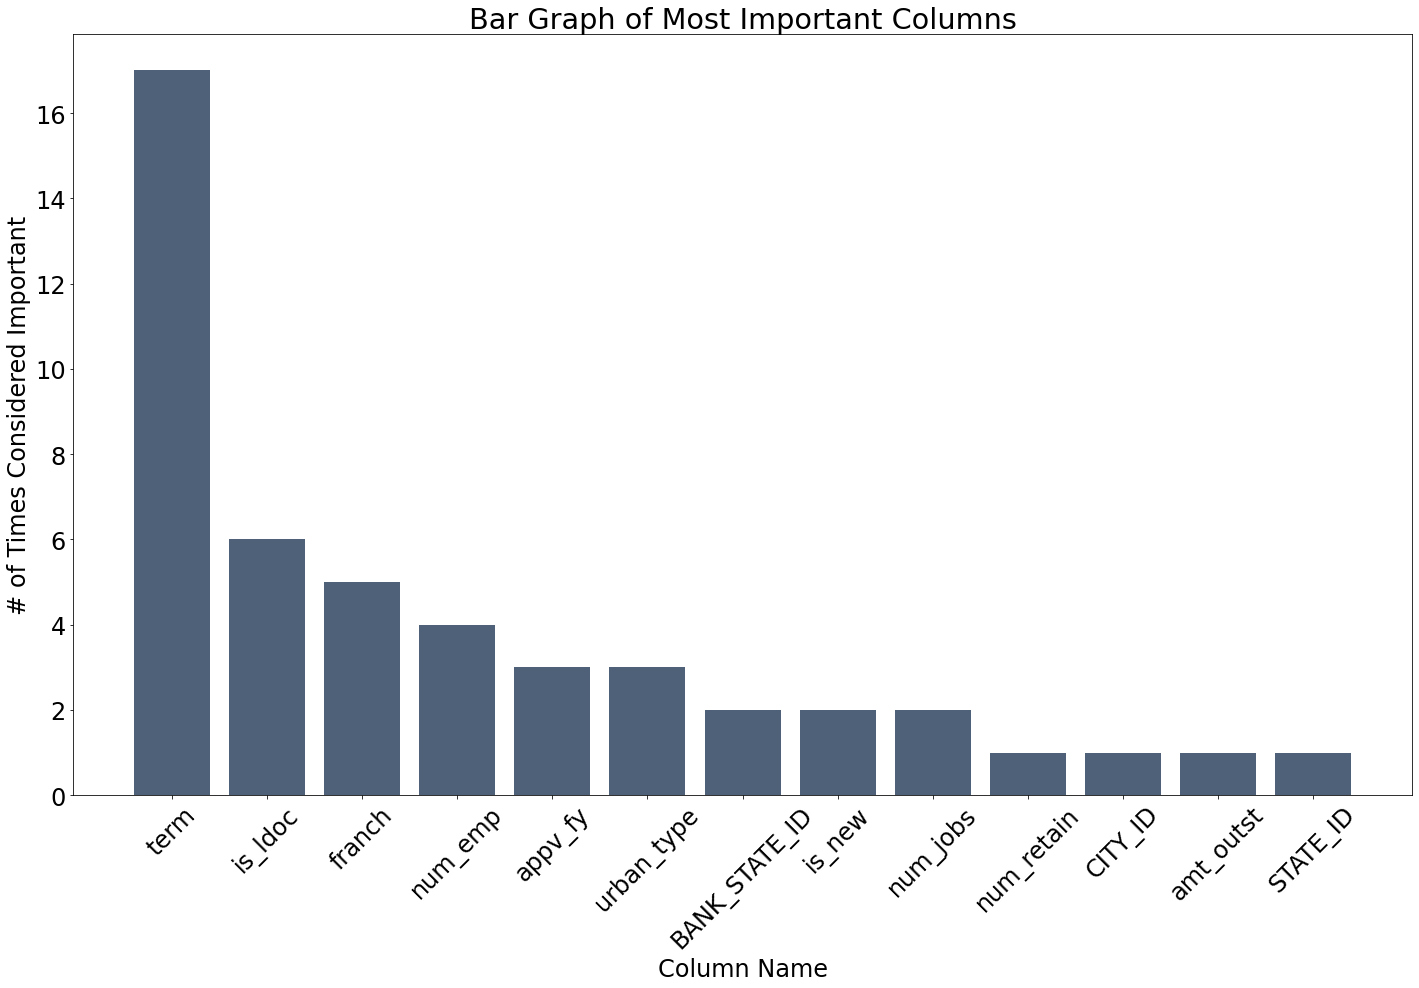

In [ ]:
fig, ax = plt.subplots(figsize=(24, 14))
ax.bar(names, values, color="#051d40", alpha=.7)
plt.title("Bar Graph of Most Important Columns")
plt.xlabel("Column Name")
plt.xticks(rotation=45)
plt.ylabel("# of Times Considered Important");

Checking columns

Checking counts for column based on if they defaulted or not

In [ ]:
df_test.head(1)

,loan_id,name,city,state,zip,bank,bank_state,naics,date_appv,appv_fy,term,num_emp,is_new,num_jobs,num_retain,franch,urban_type,is_revl,is_ldoc,date_dflt,date_disb,amt_disb,amt_outst,mis,amt_chg_off,amt_gr_appv,amt_sba,DEFAULT,CITY_ID,STATE_ID,BANK_ID,BANK_STATE_ID,T_DATE_APPV,T_DATE_DISB
174631,2257786003,SATORAUM INC,KANSAS CITY,MO,64112,COUNTRY CLUB BANK,KS,812112,2006-07-24,2006,89,2,True,2,2,1,0,-1,False,2010-05-25,2006-11-30,20000000,0,False,15305500,20000000,15000000,True,13674,24,1577,19,1153699200,1164844800


In [ ]:
df_test["PREDICTED_DEFAULT"] = clf.predict(X_test)
df_test["PREDICTION_CONFIDENCE"] = [i[0] for i in clf.predict_proba(X_test)]
df_test["PREDICTION_CONFIDENCE"] = np.where(df_test["PREDICTION_CONFIDENCE"] < .5, 1 - df_test["PREDICTION_CONFIDENCE"], df_test["PREDICTION_CONFIDENCE"])
df_test["IS_CORRECT_PREDICTION"] = df_test["DEFAULT"] == df_test["PREDICTED_DEFAULT"]

In [ ]:
dft_correct = df_test[df_test["IS_CORRECT_PREDICTION"] == True]
dft_incorrect = df_test[df_test["IS_CORRECT_PREDICTION"] == False]
dftc_d, dftc_nd = dft_correct[dft_correct["DEFAULT"] == True], dft_correct[dft_correct["DEFAULT"] == False]
dftic_d, dftic_nd = dft_incorrect[dft_incorrect["DEFAULT"] == True], dft_incorrect[dft_incorrect["DEFAULT"] == False]

In [ ]:
# cn = "is_ldoc"
# fix, ax = plt.subplots(figsize=(16, 9))
# plt.bar(["No Default", "Default"], [dft_correct[dft_correct["DEFAULT"] == False][cn].sum(), dft_correct[dft_correct["DEFAULT"] == True][cn].sum()])
# plt.title(cn);

In [ ]:
def hist_diff(col_name, bins=50):
  fix, ax = plt.subplots(figsize=master_figsize)
  ax.hist(dftc_d[col_name], bins, label="Default", color="#051d40", alpha=.7, density=True)
  ax.hist(dftc_nd[col_name], bins, label="No Default", color="blue", alpha=.7, density=True)
  plt.title(f"Histogram of {col_name} by Default Status")
  # plt.xlim(0, df[col_name].max())
  plt.xlabel(f"{col_name} (bins={bins})")
  plt.ylabel("% of occurrences")
  plt.legend();

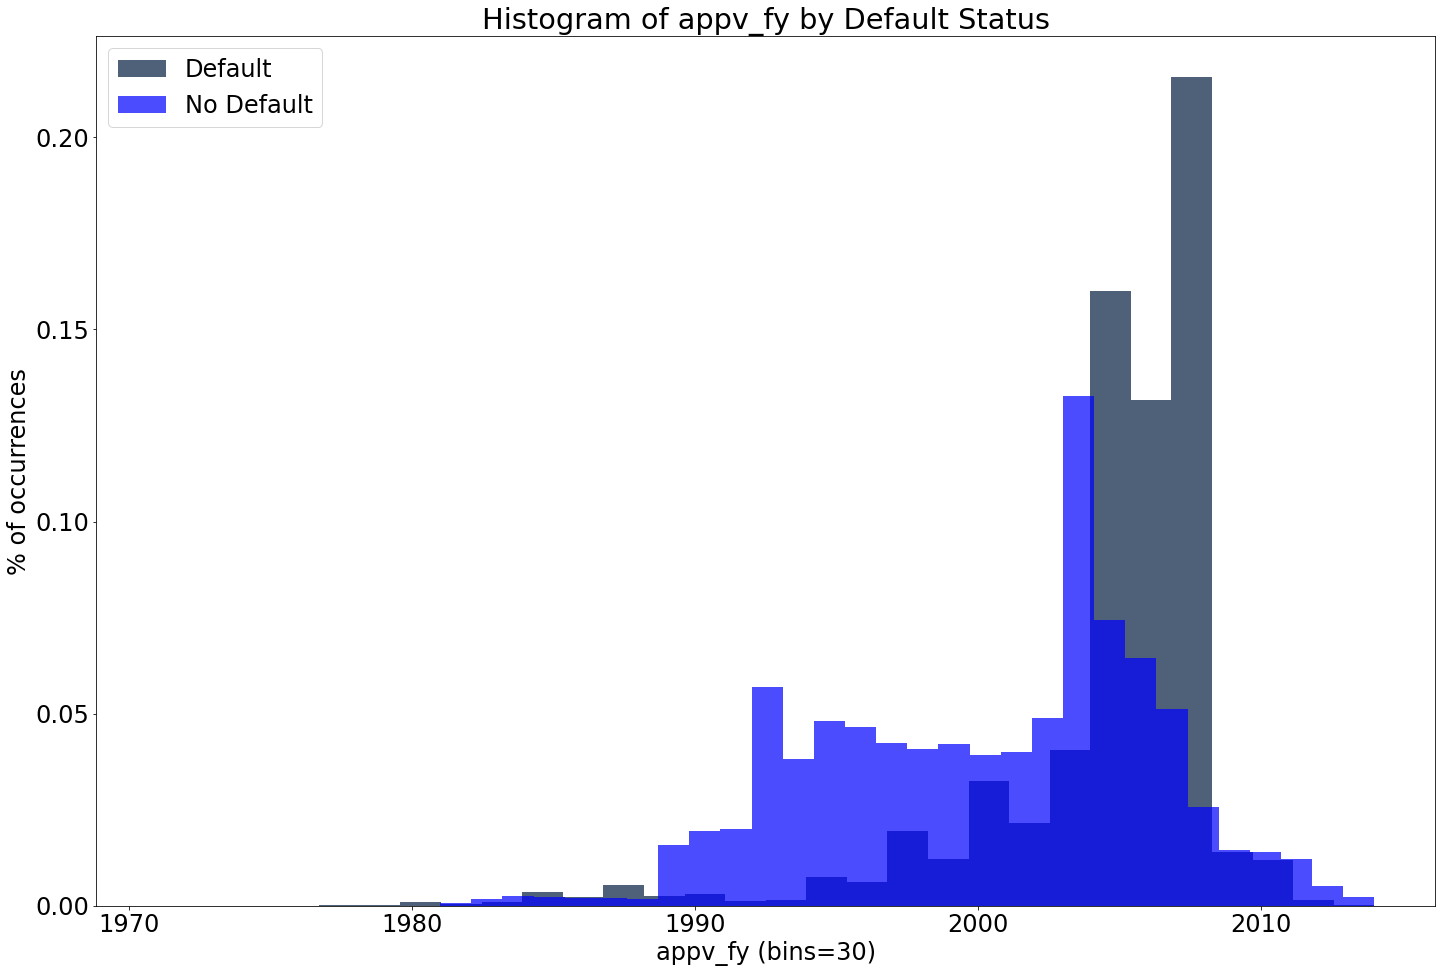

In [ ]:
hist_diff("appv_fy", 30)

One reason why year of approval might not be a good predictor of (new) defaults is because it is only showing history; a recession happened in 2008, but the year being 2008 wasn't the cause of the recession, it was some other variable not accessable.

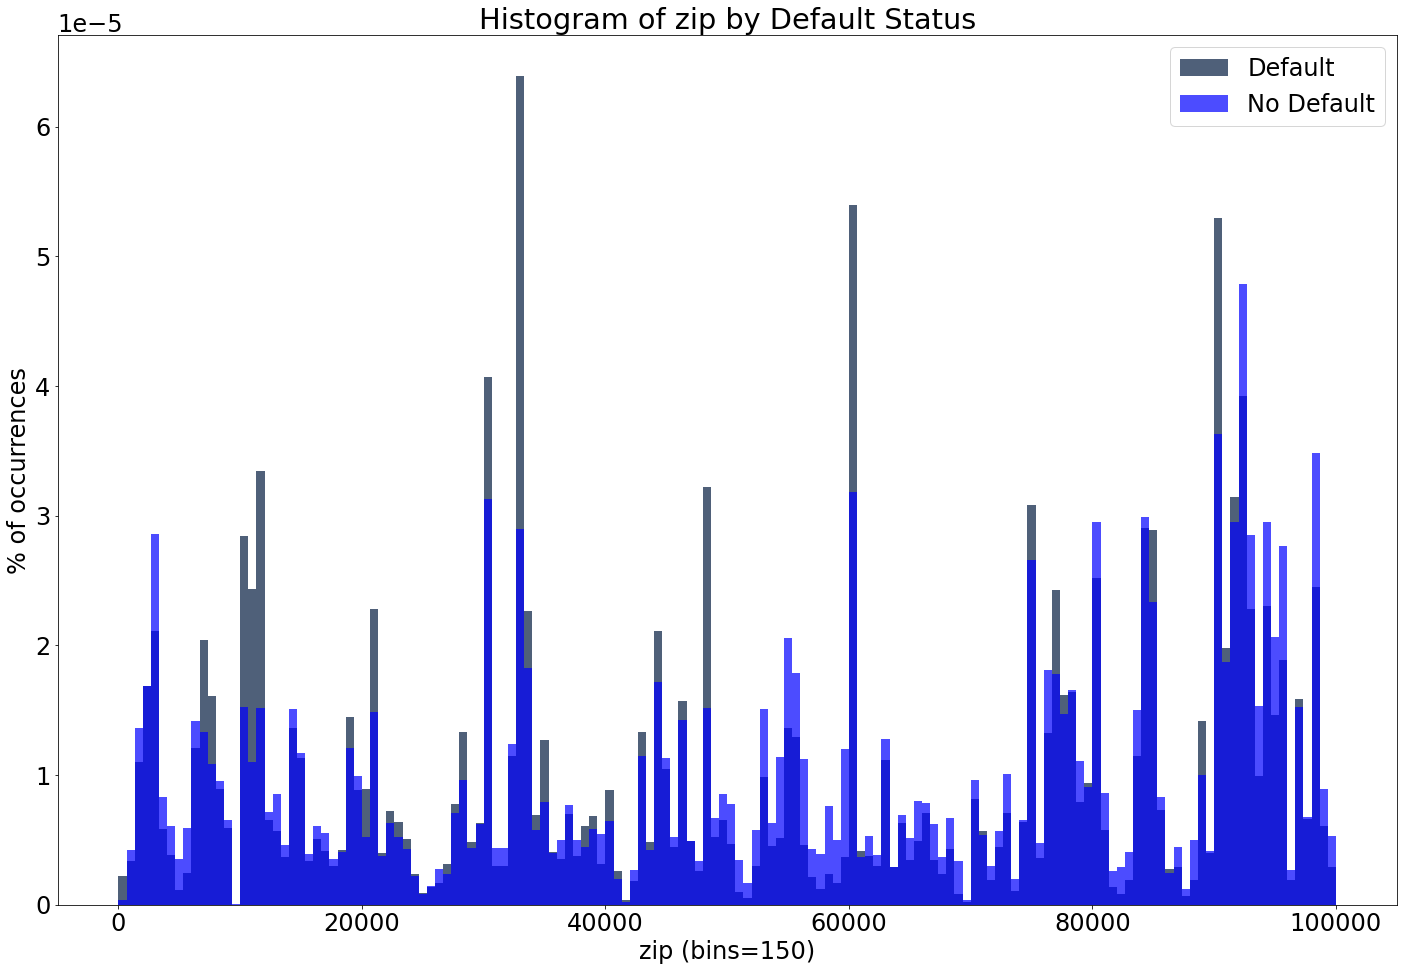

In [ ]:
hist_diff("zip", 150)

Although it makes sense that there should be an equal amount of defaults and no defaults, it seems that popular places tend to have more defaulting borrowers than the less popular places.

### Histogram of Term Length for Borrowers Who Defaulted vs No Default

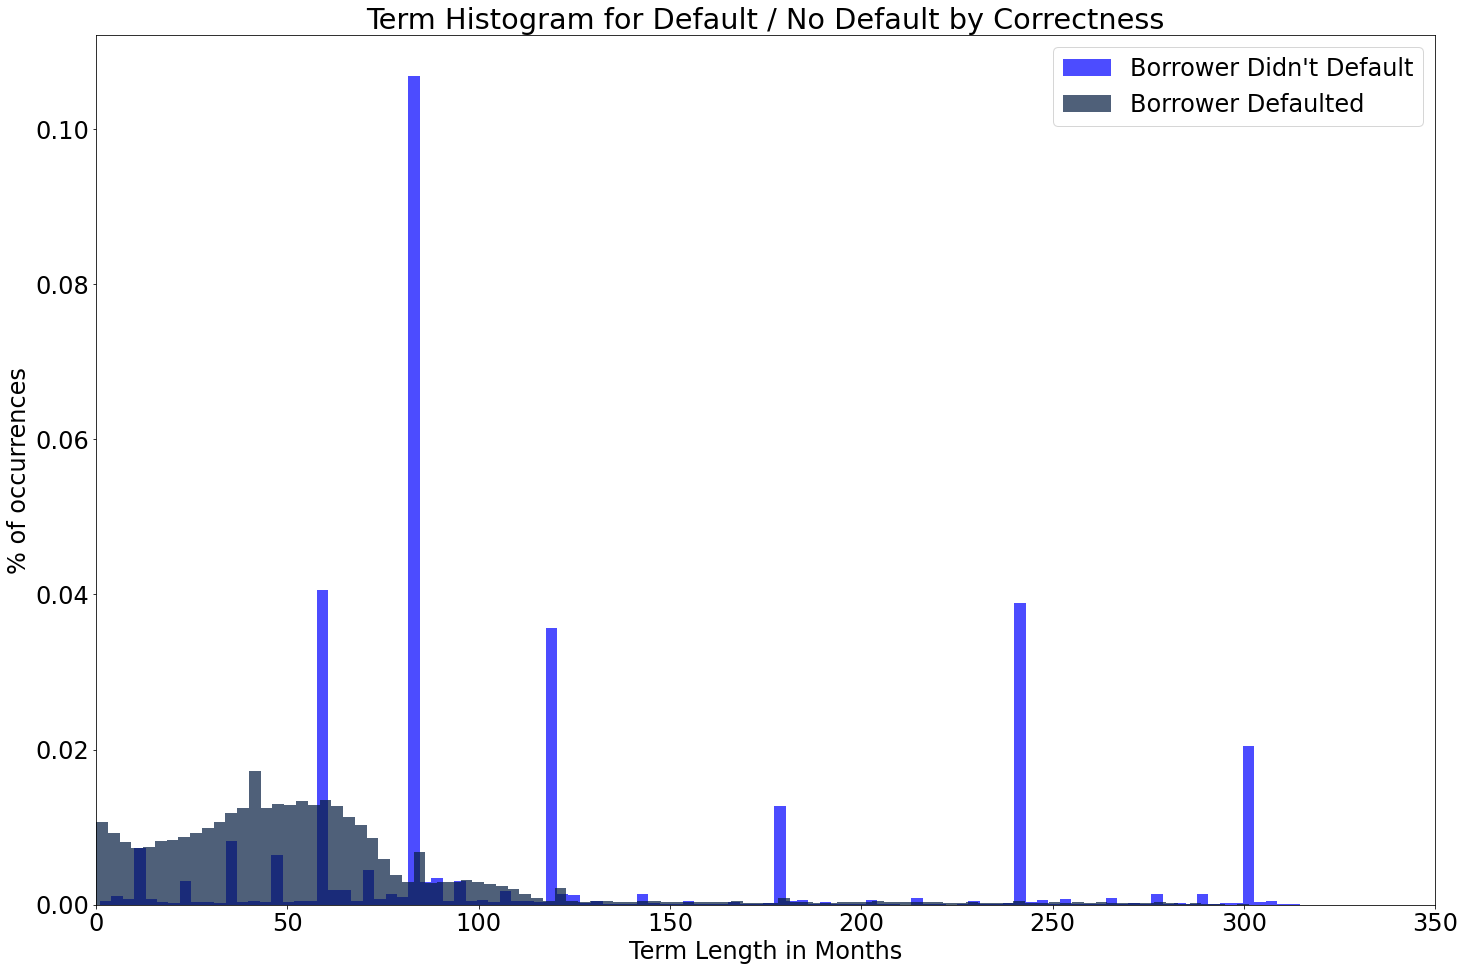

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)
# ax.hist(dftc_d["term"], 30, label="Correct; Default", color="#20c", alpha=.5, density=True)
# ax.hist(dftc_nd["term"], 150, label="Correct; No Default", color="#0af", alpha=.5, density=True)
# ax.hist(dftic_d["term"], 150, label="Incorrect; Default", color="#c02", alpha=.5, density=True)
# ax.hist(dftic_nd["term"], 30, label="Incorrect; No Default", color="#fa0", alpha=.5, density=True)
ax.hist(df_test[df_test["DEFAULT"] == False]["term"], 150, label="Borrower Didn't Default", color="blue", alpha=.7, density=True)
ax.hist(df_test[df_test["DEFAULT"] == True]["term"], 150, label="Borrower Defaulted", color="#051d40", alpha=.7, density=True)
plt.title("Term Histogram for Default / No Default by Correctness")
plt.xlim(0, 350)
plt.xlabel("Term Length in Months")
plt.legend()
plt.ylabel("% of occurrences");

Chance that they didn't default simply because as of today, they're still paying back their loan.

People who don't default seem to have a more structured approach to determine their loan term.
Notice at 80, almost none default at that time. There is a red spike, but it's almost negligible compared to blue.

## Question 3: Build a model to predict which approved loan applications will default on their loan.

Exploring results (Checking prediction confidence)

### Logistic Regression Model

In [ ]:
xlim_low, xlim_high, ylim_low, ylim_high, master_bins = .5, 1, 0, 10000, 75

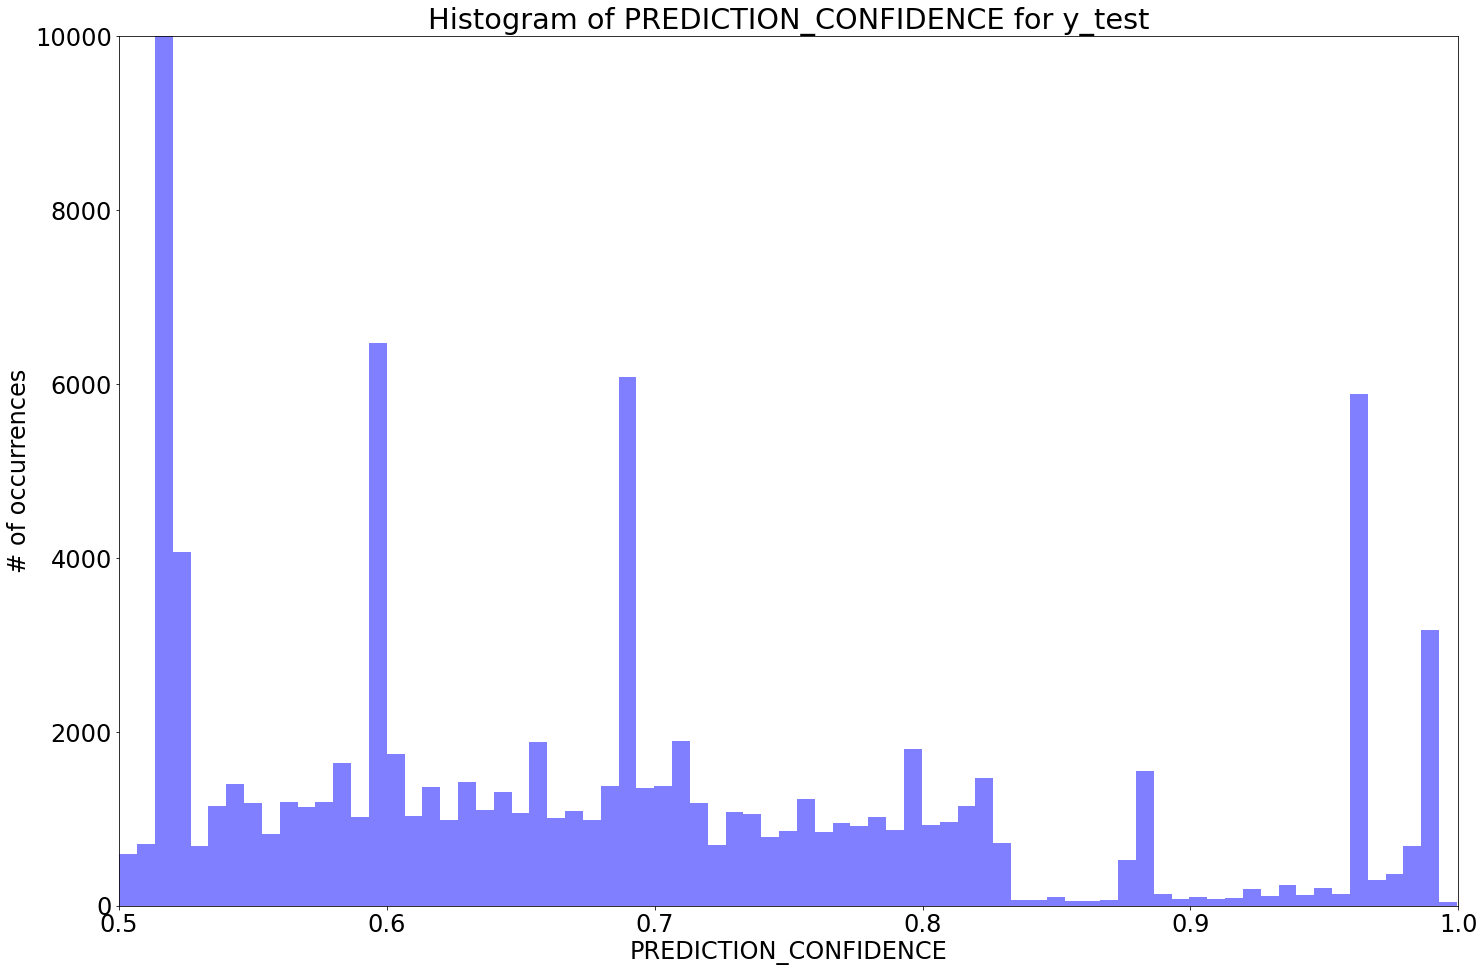

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)
ax.hist(df_test["PREDICTION_CONFIDENCE"], master_bins, color="blue", alpha=.5)
plt.title("Histogram of PREDICTION_CONFIDENCE for y_test")
plt.xlim(xlim_low, xlim_high)
plt.ylim(ylim_low, ylim_high)
plt.xlabel("PREDICTION_CONFIDENCE")
plt.ylabel("# of occurrences");

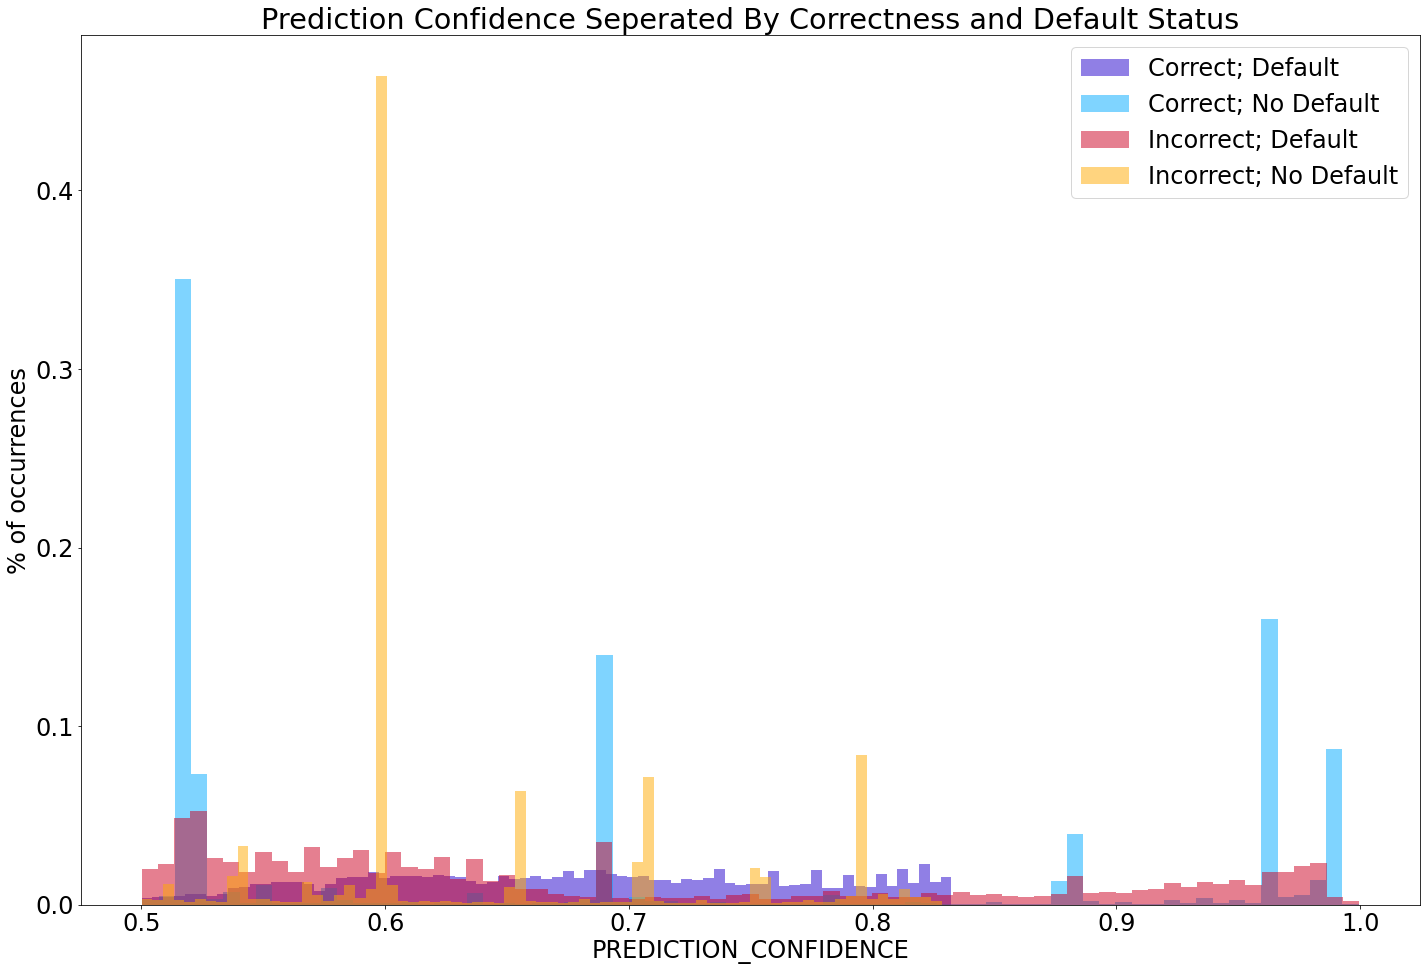

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)
ax.hist(dftc_d["PREDICTION_CONFIDENCE"], master_bins, label="Correct; Default", color="#20c", alpha=.5, weights=np.ones(dftc_d.shape[0]) / dftc_d.shape[0])
ax.hist(dftc_nd["PREDICTION_CONFIDENCE"], master_bins, label="Correct; No Default", color="#0af", alpha=.5, weights=np.ones(dftc_nd.shape[0]) / dftc_nd.shape[0])
ax.hist(dftic_d["PREDICTION_CONFIDENCE"], master_bins, label="Incorrect; Default", color="#c02", alpha=.5, weights=np.ones(dftic_d.shape[0]) / dftic_d.shape[0])
ax.hist(dftic_nd["PREDICTION_CONFIDENCE"], master_bins, label="Incorrect; No Default", color="#fa0", alpha=.5, weights=np.ones(dftic_nd.shape[0]) / dftic_nd.shape[0])
plt.title("Prediction Confidence Seperated By Correctness and Default Status")
# plt.xlim(xlim_low, xlim_high)
# plt.ylim(ylim_low, ylim_high)
plt.xlabel("PREDICTION_CONFIDENCE")
plt.legend()
plt.ylabel("% of occurrences");

Not exactly sure why non-defaults are so spiky. Maybe the model is having a hard time determining the ground truth.

Found out why; there's a cutoff for term duration where it says all borrowers do/do not default.

In [ ]:
def pct_correct_at_confidence_level_gtr_than(confidence_level: int):
  num_correct_preds = df_test[df_test["PREDICTION_CONFIDENCE"] >= confidence_level]["IS_CORRECT_PREDICTION"].sum()
  num_total = df_test[df_test["PREDICTION_CONFIDENCE"] >= confidence_level].shape[0]
  print(f"[{confidence_level}] num_correct_preds: {num_correct_preds}\n[{confidence_level}] num_total: {num_total}\n[{confidence_level}] pct_correct: {num_correct_preds / num_total}")

In [ ]:
def pct_correct_at_confidence_level_range(confidence_level_low: int, confidence_level_high: int):
  num_correct_preds = df_test[(df_test["PREDICTION_CONFIDENCE"] >= confidence_level_low) & (df_test["PREDICTION_CONFIDENCE"] <= confidence_level_high)]["IS_CORRECT_PREDICTION"].sum()
  num_total = df_test[(df_test["PREDICTION_CONFIDENCE"] >= confidence_level_low) & (df_test["PREDICTION_CONFIDENCE"] <= confidence_level_high)].shape[0]
  # print(f"[{confidence_level_low:.3f} - {confidence_level_high:.3f}] num_correct_preds: {num_correct_preds}\n[{confidence_level_low:.3f} - {confidence_level_high:.3f}] num_total: {num_total}\n[{confidence_level_low:.3f} - {confidence_level_high:.3f}] pct_correct: {(num_correct_preds / num_total):.3f}")
  # print(f"[{confidence_level_low:.2f}-{confidence_level_high:.2f}] pct_correct: {(num_correct_preds / num_total):.3f} (num_correct_preds: {num_correct_preds})")
  return [confidence_level_low, num_correct_preds / num_total]

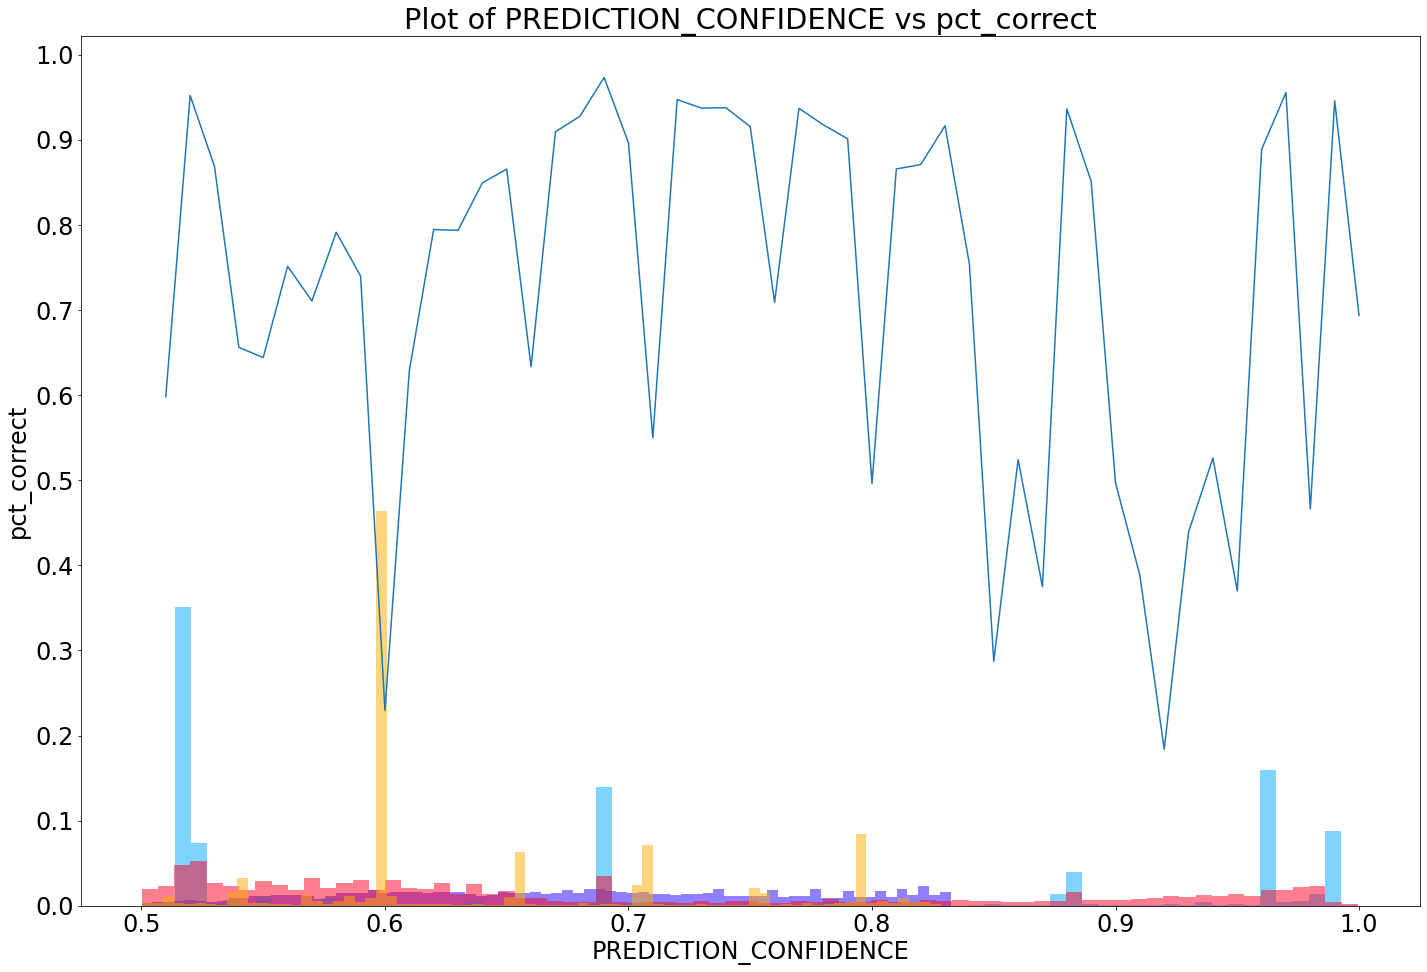

In [ ]:
graph_list_x, graph_list_y = [], []

prev_clevel = .5
increment = .01
for clevel in np.arange(prev_clevel, 1 + increment, increment):
  if prev_clevel != clevel:
    graph_list_x.append(pct_correct_at_confidence_level_range(prev_clevel, clevel)[0])
    graph_list_y.append(pct_correct_at_confidence_level_range(prev_clevel, clevel)[1])
    prev_clevel = clevel

fig, ax = plt.subplots(figsize=master_figsize)
ax.plot([i + increment for i in graph_list_x], graph_list_y)
ax.hist(dftc_d["PREDICTION_CONFIDENCE"], master_bins, label="Correct; Default", color="#20f", alpha=.5, weights=np.ones(dftc_d.shape[0]) / dftc_d.shape[0])
ax.hist(dftc_nd["PREDICTION_CONFIDENCE"], master_bins, label="Correct; No Default", color="#0af", alpha=.5, weights=np.ones(dftc_nd.shape[0]) / dftc_nd.shape[0])
ax.hist(dftic_d["PREDICTION_CONFIDENCE"], master_bins, label="Incorrect; Default", color="#f02", alpha=.5, weights=np.ones(dftic_d.shape[0]) / dftic_d.shape[0])
ax.hist(dftic_nd["PREDICTION_CONFIDENCE"], master_bins, label="Incorrect; No Default", color="#fa0", alpha=.5, weights=np.ones(dftic_nd.shape[0]) / dftic_nd.shape[0])
plt.title("Plot of PREDICTION_CONFIDENCE vs pct_correct")
plt.xlabel("PREDICTION_CONFIDENCE")
plt.ylabel("pct_correct")
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks(np.arange(.5, 1.01, 0.1));


#### Classification Report & Confusion Matrix for Model

Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.82      0.75      0.78     48019
        True       0.77      0.83      0.80     48115

    accuracy                           0.79     96134
   macro avg       0.79      0.79      0.79     96134
weighted avg       0.79      0.79      0.79     96134



Confusion Matrix

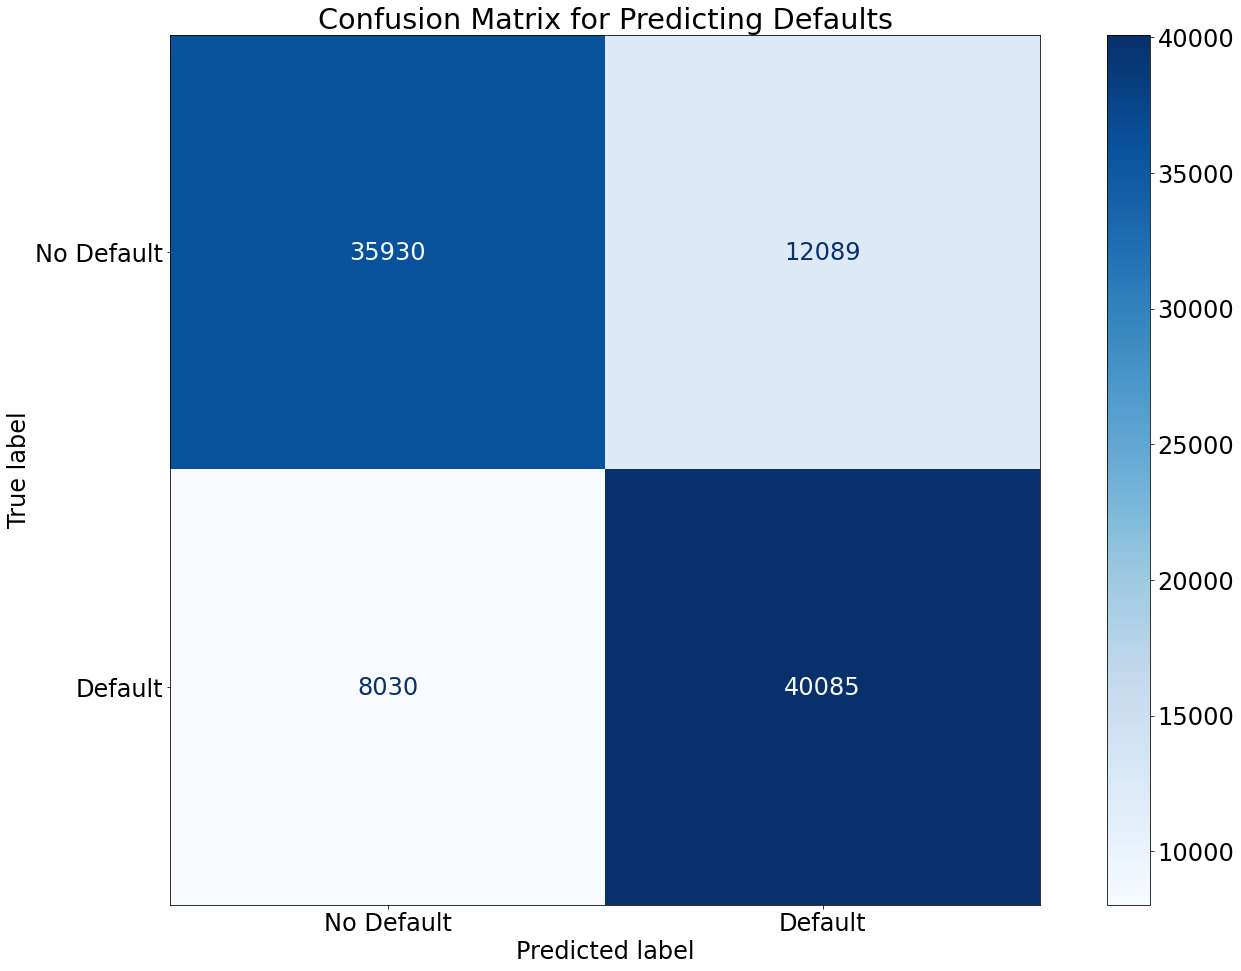

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=["No Default", "Default"])  # clf.classes_  # ["No Default", "Default"]
fig, ax = plt.subplots(figsize=master_figsize)
plt.title("Confusion Matrix for Predicting Defaults")
cm_disp.plot(ax=ax, cmap="Blues", values_format="");

### Non-fancy new model

In [ ]:
top = 13
term_freq_list = []
term_freq_series = df["term"].value_counts()[:top]
for name, val in term_freq_series.iteritems():
    term_freq_list.append(name)
term_freq_list

[84, 60, 240, 120, 300, 180, 36, 12, 48, 72, 24, 96, 90]

In [ ]:
def asdf(num):
    if num in term_freq_list:
        return False
    else:
        return True

In [ ]:
df_test["predictor?"] = df_test["term"]
df_test["predictor?"] = df_test["predictor?"].apply(lambda x: asdf(x))
df_test["predictor?"] = df_test["predictor?"].astype(bool)

In [ ]:
df_test["pred_right?"] = df_test["DEFAULT"] == df_test["predictor?"]
df_test["pred_right?"].sum() / df_test.shape[0]

0.8771818503339089

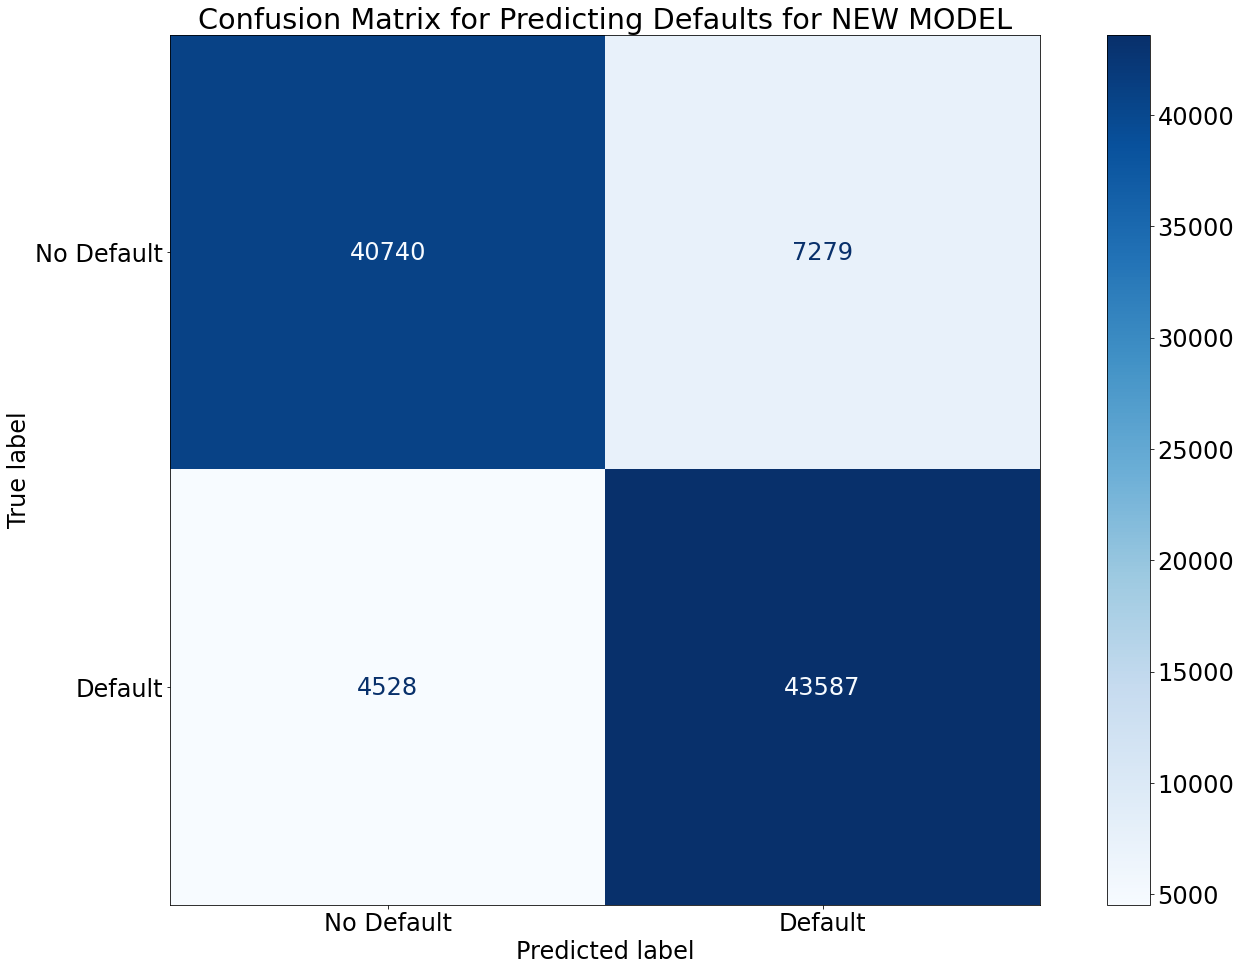

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, df_test["predictor?"])
cm_disp = ConfusionMatrixDisplay(cm, display_labels=["No Default", "Default"])  # clf.classes_  # ["No Default", "Default"]
fig, ax = plt.subplots(figsize=master_figsize)
plt.title("Confusion Matrix for Predicting Defaults for NEW MODEL")
cm_disp.plot(ax=ax, cmap="Blues", values_format="");

# Other Stuff (Finding Best Column Combination)

## Previous Versions

In [ ]:
# stuff = [1, 2, 3]
# for L in range(0, len(stuff)+1):
#   for subset in itertools.combinations(stuff, L):
#     print(subset)

In [ ]:
# import itertools
# import multiprocessing

# important_columns = X_train.columns
# subset_list = []
# for L in range(0, len(important_columns)+1):
#   for subset in itertools.combinations(important_columns, L):
#     subset_list.append(subset)

# total_subsets = 2**len(important_columns) - 1
# max_score = 0
# iter_count = 1

# def fitted(subset):
#   global max_score, iter_count
#   if len(subset) > 0:
#     clf.fit(X_train[list(subset)], y_train)
#     score = clf.score(X_test[list(subset)], y_test)
#     if score > max_score:
#       max_score = score
#       best_cols = subset
#     # if iter_count % 100 == 0 or iter_count <= len(important_columns) or iter_count == total_subsets:
#     print(f"iter_count: {iter_count}/{total_subsets} ({(iter_count / total_subsets * 100):.4f}%) max_score: {max_score:.3f}, best_cols: {best_cols}, score: {score:.3f}, cols: {subset}")
#     iter_count += 1

# processes = []
# for i, ss in enumerate(subset_list):
#   p = multiprocessing.Process(target=fitted, args=(ss,))
#   p.start()
#   processes.append(p)

# for process in processes:
#   process.join()

In [ ]:
# print(subset_list[:6])

In [ ]:
# import itertools
# import concurrent.futures as cf

# important_columns = X_train.columns
# subset_list = []
# for L in range(0, len(important_columns)+1):
#   for subset in itertools.combinations(important_columns, L):
#     subset_list.append(subset)

# total_subsets = 2**len(important_columns) - 1
# max_score = 0
# iter_count = 1

# def fitted(subset):
#   global max_score, iter_count
#   if len(subset) > 0:
#     clf.fit(X_train[list(subset)], y_train)
#     score = clf.score(X_test[list(subset)], y_test)
#     if score > max_score:
#       max_score = score
#       best_cols = subset
#     # if iter_count % 100 == 0 or iter_count <= len(important_columns) or iter_count == total_subsets:
#     print(f"iter_count: {iter_count}/{total_subsets} ({(iter_count / total_subsets * 100):.4f}%) max_score: {max_score:.3f}, best_cols: {best_cols}, score: {score:.3f}, cols: {subset}")
#     iter_count += 1

# with cf.ProcessPoolExecutor() as executor:
#   executor.map(fitted, subset_list)

In [ ]:
# import itertools

# important_columns = X_train.columns
# total_subsets = 2**len(important_columns) - 1
# max_score = 0
# iter_count = 1
# for L in range(0, len(important_columns)+1):
#   for subset in itertools.combinations(important_columns, L):
#     # print(f"!!!!!!{list(subset)}")
#     if len(subset) < 1:
#       continue
#     # print(list(subset))
#     clf.fit(X_train[list(subset)], y_train)
#     score = clf.score(X_test[list(subset)], y_test)
#     if score > max_score:
#       max_score = score
#       best_cols = subset
#     if iter_count % 100 == 0 or iter_count <= len(important_columns) or iter_count == total_subsets:
#       print(f"iter_count: {iter_count}/{total_subsets} ({(iter_count / total_subsets * 100):.4f}%) max_score: {max_score:.3f}, best_cols: {best_cols}, score: {score:.3f}, cols: {subset}")
#     iter_count += 1

## Current Version

In [ ]:
# df_big, df_small = train_test_split(df, test_size=.01)

# df_train, df_test = train_test_split(df_small, test_size=.3)

# # defining X by removal
# y_unneeded = ["date_dflt", "amt_chg_off", "DEFAULT", "mis"]
# dtype_unneeded = ["name", "city", "state", "bank", "bank_state", "date_appv", "date_disb"]

# useless_columns = ["loan_id", "CITY_ID", "STATE_ID", "BANK_ID", "T_DATE_APPV", "T_DATE_DISB"]  # bank state id seems useful
# found_to_be_useless = ["zip"]
# unneeded_subset = y_unneeded + dtype_unneeded + useless_columns + found_to_be_useless # used for the big one :tm:

# X_train = df_train.drop(unneeded_subset, axis=1)
# # X_train = df_train[best_cols]
# y_train = df_train["DEFAULT"]

# X_test = df_test.drop(unneeded_subset, axis=1)
# # X_test = df_test[best_cols]
# y_test = df_test["DEFAULT"]

In [ ]:
# import itertools

# important_columns = X_train.columns
# subset_list = []
# for L in range(0, len(important_columns)+1):
#   for subset in itertools.combinations(important_columns, L):
#     if 0 < len(subset) <= 7:
#       subset_list.append(list(subset))

# def fit_and_score(subset):
#   clf.fit(X_train[list(subset)], y_train)
#   return clf.score(X_test[subset], y_test)

# total_subsets = len(subset_list)
# max_score = 0
# iter_count = 1
# for subset in subset_list:
#   score = fit_and_score(subset)
#   if score > max_score:
#     max_score = score
#     best_cols = subset
#   if iter_count % 100 == 0 or iter_count <= len(important_columns) or iter_count == total_subsets:
#     print(f"iter_count: {iter_count}/{total_subsets} ({(iter_count / total_subsets * 100):.4f}%) max_score: {max_score:.3f}, best_cols: {best_cols}, score: {score:.3f}, cols: {subset}")
#   iter_count += 1

In [ ]:
# new results (subset from previous):
# ltp1: iter_count: 2047/2047 (100.0000%) max_score: 0.794, best_cols: ('franch', 'term', 'is_ldoc')
# ltp2: iter_count: 2047/2047 (100.0000%) max_score: 0.763, best_cols: ('urban_type', 'is_ldoc', 'term', 'is_revl', 'num_jobs', 'is_new')
# ltp3: iter_count: 2047/2047 (100.0000%) max_score: 0.907, best_cols: ('term', 'is_revl', 'BANK_STATE_ID', 'is_ldoc')

# new results:
# ltp0: iter_count: 131071/131071 (100.0000%) max_score: 0.784, best_cols: ('appv_fy', 'term', 'num_emp', 'num_retain', 'franch')
# ['term', 'is_ldoc', 'franch', 'urban_type']

# pc0: iter_count: 658000/8388607 (7.8440%) max_score: 0.876, best_cols: ('term', 'is_new', 'is_revl', 'is_ldoc')
# pc1: iter_count: 109200/131072 (83.3130%) max_score: 0.876, best_cols: ('term', 'num_emp', 'num_jobs', 'num_retain', 'franch', 'is_ldoc', 'BANK_STATE_ID')
# pc2: iter_count: 65535/65535 (100.0000%) max_score: 0.845, best_cols: ('term', 'is_revl', 'is_ldoc')
# pc3: iter_count: 41225/41225 (100.0000%) max_score: 0.825, best_cols: ('term', 'num_retain', 'franch', 'is_revl', 'is_ldoc')
# pc4: iter_count: 145498/145498 (100.0000%) max_score: 0.773, best_cols: ('term', 'num_jobs', 'is_ldoc', 'BANK_STATE_ID')
# pc5: iter_count: 44551/44551 (100.0000%) max_score: 0.784, best_cols: ('term', 'num_emp', 'franch', 'urban_type', 'BANK_STATE_ID')
# pc6: iter_count: 21777/21777 (100.0000%) max_score: 0.753, best_cols: ('franch',)
# pc7: iter_count: 21777/21777 (100.0000%) max_score: 0.814, best_cols: ('term', 'num_emp', 'urban_type', 'is_revl', 'is_ldoc')
# pc8: iter_count: 16383/16383 (100.0000%) max_score: 0.866, best_cols: ('term', 'franch')
# pc9: iter_count: 16383/16383 (100.0000%) max_score: 0.784, best_cols: ('term', 'num_emp', 'is_new', 'is_revl', 'is_ldoc')



In [ ]:
# idea: log results in a dict(or dataframe) so that I can access cool stuff ex: score, and (SET of)cols